Original shape: (2000, 8)
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


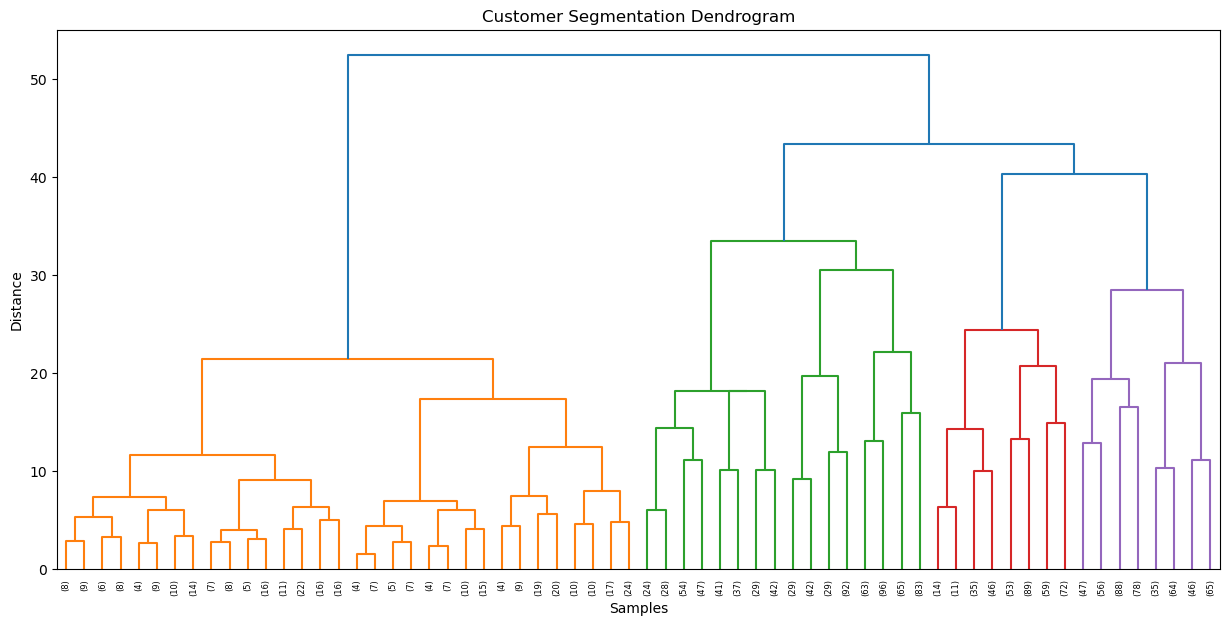

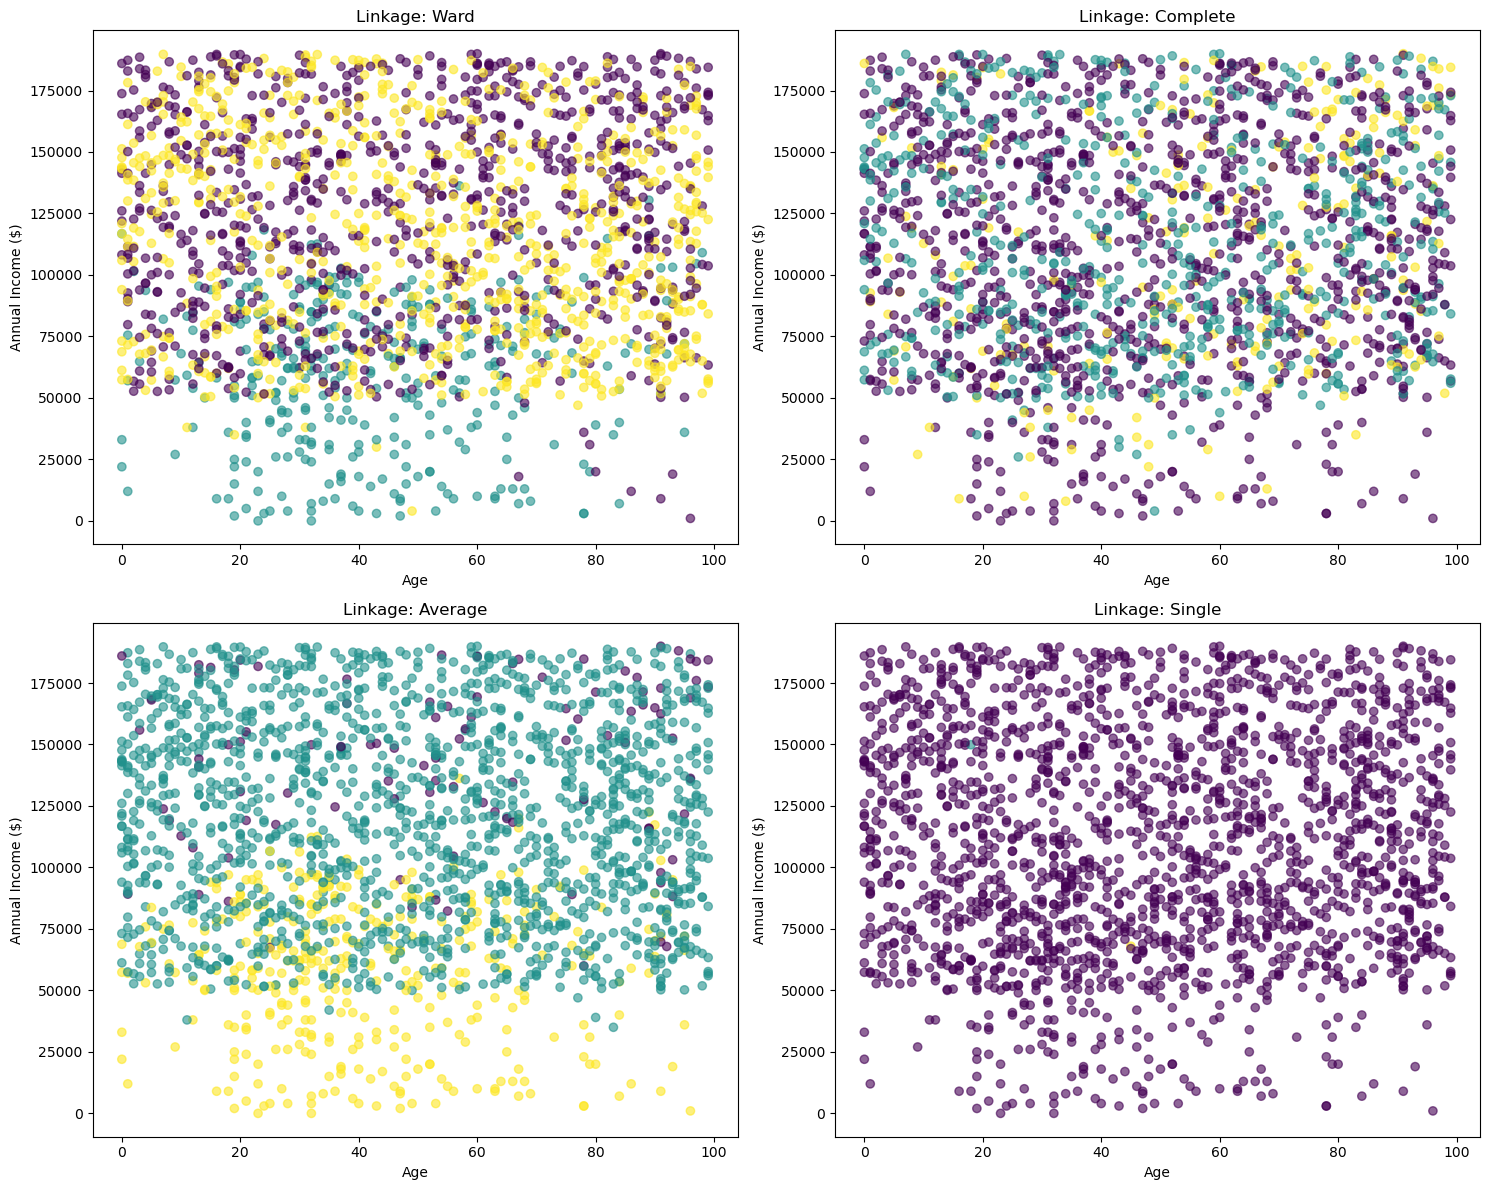

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load your actual dataset
df = pd.read_csv("CustomerSegmentationexport.csv")

# Check data
print("Original shape:", df.shape)
print(df.head())

# Keep only numeric columns (remove customer IDs or text columns if any)
numeric_df = df.select_dtypes(include=[np.number])

# Drop NA rows
numeric_df = numeric_df.dropna()

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)

# Perform hierarchical clustering (ward)
linkage_matrix = linkage(data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Customer Segmentation Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Compare linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, method in enumerate(linkage_methods):
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    clusters = clustering.fit_predict(data_scaled)
    
    axes[i].scatter(numeric_df.iloc[:, 1], numeric_df.iloc[:, 2], 
                    c=clusters, cmap='viridis', alpha=0.6)
    axes[i].set_title(f'Linkage: {method.capitalize()}')
    axes[i].set_xlabel(numeric_df.columns[1])
    axes[i].set_ylabel(numeric_df.columns[2])

plt.tight_layout()
plt.show()